In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("f.csv")

In [3]:
df

station_id     vc_id                mes_datetime  temp     rh   td  \
0                92  66789712  2021-04-28 00:00:00.000000   0.8  100.0  0.8   
1                72  69846131  2021-04-28 08:54:00.000000  13.7   25.0 -6.3   
2                73  69846132  2021-04-28 08:54:00.000000  13.2   24.0 -7.1   
3                82  69846137  2021-04-28 08:55:00.000000  13.7   24.0 -6.3   
4                53  69846186  2021-04-28 08:55:00.000000  13.1   23.3 -7.4   
...             ...       ...                         ...   ...    ...  ...   
3372568          38  77802865  2022-02-28 23:56:00.000000  -5.0   76.5 -8.5   
3372569          73  77802878  2022-02-28 23:58:00.000000  -2.8   62.0 -9.1   
3372570          82  77802873  2022-02-28 23:58:00.000000  -0.5   54.0 -8.7   
3372571          72  77802871  2022-02-28 23:58:00.000000  -0.5   54.0 -8.7   
3372572          94  77802879  2022-02-28 23:59:00.000000  -2.1   66.0 -7.7   

          ws     wd  st1   ts1  st2  ts2  grip  water  snow  ice     vis  
0        0.6  262.0  NaN   NaN  NaN  NaN  0.81   0.07   0.0  0.0  2000.0  
1        2.6  225.0  NaN  26.3  NaN  NaN  0.82   0.00   0.0  0.0  2000.0  
2        1.6  338.0  NaN  25.7  NaN  NaN  0.82   0.00   0.0  0.0  2000.0  
3        2.4  232.0  NaN  23.6  NaN  NaN  0.82   0.00   0.0  0.0  2000.0  
4        1.1  155.0  NaN  23.5  NaN  NaN  0.82   0.00   0.0  0.0  2000.0  
...      ...    ...  ...   ...  ...  ...   ...    ...   ...  ...     ...  
3372568  0.3   89.0  1.0  -3.4  NaN  NaN  0.82   0.00   0.0  0.0     NaN  
3372569  1.0  161.0  1.0  -2.9  NaN  NaN  0.82   0.00   0.0  0.0  2000.0  
3372570  3.2   61.0  1.0  -2.1  NaN  NaN  0.82   0.00   0.0  0.0  2000.0  
3372571  3.2   61.0  1.0  -1.8  NaN  NaN  0.82   0.00   0.0  0.0  2000.0  
3372572  0.9   10.0  1.0   NaN  NaN  NaN  0.82   0.00   0.0  0.0  2000.0  

[3372573 rows x 17 columns]

In [4]:
len(df)

3372573

Empty DataFrame
Columns: [station_id, vc_id, mes_datetime, temp, rh, td, ws, wd, st1, ts1, st2, ts2, grip, water, snow, ice, vis]
Index: []

In [5]:
# odstranime hodnoty kde zakladne meteo udaje niesu merane (temp,rh,td)
df_clean = df[(df["temp"].notna()) & (df["rh"].notna()) & (df["td"].notna())]
len(df_clean)

3328216

In [6]:
# odstranime take merania ktore pri cestnom senzore chyba 1 z hodnot (st[1,2] != nan & ts[1,2] != nan)
df_clean = df_clean[((df_clean["st1"].notna()) & (df["ts1"].notna())) | ((df_clean["st2"].notna()) & (df["ts2"].notna()))]
# df_clean = df_clean[(df_clean["st2"].notna()) & (df["ts2"].notna())]
len(df_clean)

/tmp/ipykernel_40094/1671446792.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[((df_clean["st1"].notna()) & (df["ts1"].notna())) | ((df_clean["st2"].notna()) & (df["ts2"].notna()))]


2458835

In [7]:
# odstranime take merania ktore nemaju udaj o gripe
df_clean = df_clean[(df_clean["grip"].notna())]
len(df_clean)

1889362

In [8]:
#dropneme prazdny stlpec st2
df_clean["st2"].value_counts()

Series([], Name: st2, dtype: int64)

In [9]:
#dropneme prazdny stlpec ts2
df_clean["ts2"].value_counts()

Series([], Name: ts2, dtype: int64)

In [10]:
df_clean = df_clean.drop(columns=["st2", "ts2"])


In [11]:
# zrusime stnaice ktore niesu cely rok
df_clean = df_clean[(df_clean["station_id"] != 1) & (df_clean["station_id"] != 38)]
len(df_clean)


1642398

In [12]:
df_clean['station_id'].value_counts()

82    343076
73    342994
72    342853
50    204779
53    204554
54    204142
Name: station_id, dtype: int64

In [13]:

# zmazeme 4 zaznamy ktore nemaju vis (vsetky nan okrem ws,wd)
df_clean = df_clean.drop(df_clean[df_clean.drop(columns=['ws','wd']).isna().any(axis=1)].index)
len(df_clean)

# len(df_clean.dropna())

1642394

In [14]:
# vytvorime timestamp z merania
df_clean['mes_datetime'] = df_clean['mes_datetime'].apply(lambda x: x[:-7])

df_clean['timestamp'] = df_clean['mes_datetime'].apply(lambda x: pd.Timestamp(x).value)

In [16]:

aa = df_clean.st1.apply(lambda x: pd.Series(list(str(int(x)).zfill(3))).astype(int))
aa

0  1  2
16896    0  0  1
16897    0  0  1
16920    0  0  1
16921    0  0  1
16922    0  0  1
...     .. .. ..
3372564  0  0  1
3372566  0  0  1
3372569  0  0  1
3372570  0  0  1
3372571  0  0  1

[1642394 rows x 3 columns]

In [17]:
df_clean = pd.concat([df_clean, aa], axis=1, join="inner")
df_clean= df_clean.rename(columns={0: "warning",1: "rain",2: "surface_state"})


In [18]:
df_clean

station_id     vc_id         mes_datetime  temp    rh   td   ws  \
16896            72  69959032  2021-05-02 22:09:00   9.1  67.0  3.4  5.7   
16897            73  69959031  2021-05-02 22:09:00   8.6  69.0  3.3  1.9   
16920            50  69959104  2021-05-02 22:10:00   8.9  68.4  3.4  3.2   
16921            54  69959103  2021-05-02 22:10:00   8.2  66.9  2.4  3.4   
16922            53  69959102  2021-05-02 22:10:00   6.4  64.4  0.1  1.3   
...             ...       ...                  ...   ...   ...  ...  ...   
3372564          72  77802806  2022-02-28 23:55:00  -0.5  54.0 -8.7  2.9   
3372566          73  77802796  2022-02-28 23:55:00  -2.6  61.0 -9.0  1.1   
3372569          73  77802878  2022-02-28 23:58:00  -2.8  62.0 -9.1  1.0   
3372570          82  77802873  2022-02-28 23:58:00  -0.5  54.0 -8.7  3.2   
3372571          72  77802871  2022-02-28 23:58:00  -0.5  54.0 -8.7  3.2   

            wd  st1   ts1  grip  water  snow  ice     vis  \
16896    262.0  1.0  10.7  0.82    0.0   0.0  0.0  2000.0   
16897     30.0  1.0  11.0  0.82    0.0   0.0  0.0  2000.0   
16920    149.0  1.0  10.1  0.82    0.0   0.0  0.0  2000.0   
16921    312.0  1.0  10.9  0.82    0.0   0.0  0.0  2000.0   
16922    218.0  1.0   9.4  0.82    0.0   0.0  0.0  2000.0   
...        ...  ...   ...   ...    ...   ...  ...     ...   
3372564   59.0  1.0  -1.6  0.82    0.0   0.0  0.0  2000.0   
3372566  166.0  1.0  -3.3  0.82    0.0   0.0  0.0  2000.0   
3372569  161.0  1.0  -2.9  0.82    0.0   0.0  0.0  2000.0   
3372570   61.0  1.0  -2.1  0.82    0.0   0.0  0.0  2000.0   
3372571   61.0  1.0  -1.8  0.82    0.0   0.0  0.0  2000.0   

                   timestamp  warning  rain  surface_state  
16896    1619993340000000000        0     0              1  
16897    1619993340000000000        0     0              1  
16920    1619993400000000000        0     0              1  
16921    1619993400000000000        0     0              1  
16922    1619993400000000000        0     0              1  
...                      ...      ...   ...            ...  
3372564  1646092500000000000        0     0              1  
3372566  1646092500000000000        0     0              1  
3372569  1646092680000000000        0     0              1  
3372570  1646092680000000000        0     0              1  
3372571  1646092680000000000        0     0              1  

[1642394 rows x 19 columns]

In [20]:
dumm = pd.get_dummies(df_clean.surface_state, prefix='surface_state')
dumm

surface_state_0  surface_state_1  surface_state_2  surface_state_3  \
16896                  0                1                0                0   
16897                  0                1                0                0   
16920                  0                1                0                0   
16921                  0                1                0                0   
16922                  0                1                0                0   
...                  ...              ...              ...              ...   
3372564                0                1                0                0   
3372566                0                1                0                0   
3372569                0                1                0                0   
3372570                0                1                0                0   
3372571                0                1                0                0   

         surface_state_5  surface_state_6  surface_state_7  surface_state_9  
16896                  0                0                0                0  
16897                  0                0                0                0  
16920                  0                0                0                0  
16921                  0                0                0                0  
16922                  0                0                0                0  
...                  ...              ...              ...              ...  
3372564                0                0                0                0  
3372566                0                0                0                0  
3372569                0                0                0                0  
3372570                0                0                0                0  
3372571                0                0                0                0  

[1642394 rows x 8 columns]

In [22]:
df_clean = pd.concat([df_clean, dumm],axis=1)
df_clean

station_id     vc_id         mes_datetime  temp    rh   td   ws  \
16896            72  69959032  2021-05-02 22:09:00   9.1  67.0  3.4  5.7   
16897            73  69959031  2021-05-02 22:09:00   8.6  69.0  3.3  1.9   
16920            50  69959104  2021-05-02 22:10:00   8.9  68.4  3.4  3.2   
16921            54  69959103  2021-05-02 22:10:00   8.2  66.9  2.4  3.4   
16922            53  69959102  2021-05-02 22:10:00   6.4  64.4  0.1  1.3   
...             ...       ...                  ...   ...   ...  ...  ...   
3372564          72  77802806  2022-02-28 23:55:00  -0.5  54.0 -8.7  2.9   
3372566          73  77802796  2022-02-28 23:55:00  -2.6  61.0 -9.0  1.1   
3372569          73  77802878  2022-02-28 23:58:00  -2.8  62.0 -9.1  1.0   
3372570          82  77802873  2022-02-28 23:58:00  -0.5  54.0 -8.7  3.2   
3372571          72  77802871  2022-02-28 23:58:00  -0.5  54.0 -8.7  3.2   

            wd  st1   ts1  ...  rain  surface_state  surface_state_0  \
16896    262.0  1.0  10.7  ...     0              1                0   
16897     30.0  1.0  11.0  ...     0              1                0   
16920    149.0  1.0  10.1  ...     0              1                0   
16921    312.0  1.0  10.9  ...     0              1                0   
16922    218.0  1.0   9.4  ...     0              1                0   
...        ...  ...   ...  ...   ...            ...              ...   
3372564   59.0  1.0  -1.6  ...     0              1                0   
3372566  166.0  1.0  -3.3  ...     0              1                0   
3372569  161.0  1.0  -2.9  ...     0              1                0   
3372570   61.0  1.0  -2.1  ...     0              1                0   
3372571   61.0  1.0  -1.8  ...     0              1                0   

         surface_state_1  surface_state_2  surface_state_3  surface_state_5  \
16896                  1                0                0                0   
16897                  1                0                0                0   
16920                  1                0                0                0   
16921                  1                0                0                0   
16922                  1                0                0                0   
...                  ...              ...              ...              ...   
3372564                1                0                0                0   
3372566                1                0                0                0   
3372569                1                0                0                0   
3372570                1                0                0                0   
3372571                1                0                0                0   

         surface_state_6  surface_state_7  surface_state_9  
16896                  0                0                0  
16897                  0                0                0  
16920                  0                0                0  
16921                  0                0                0  
16922                  0                0                0  
...                  ...              ...              ...  
3372564                0                0                0  
3372566                0                0                0  
3372569                0                0                0  
3372570                0                0                0  
3372571                0                0                0  

[1642394 rows x 27 columns]

In [58]:
df_clean.groupby("timestamp").count()

station_id  vc_id  mes_datetime  temp  rh  td  ws  wd  \
timestamp                                                                    
1619993340000000000           2      2             2     2   2   2   2   2   
1619993400000000000           4      4             4     4   4   4   4   4   
1619993520000000000           2      2             2     2   2   2   2   2   
1619993580000000000           1      1             1     1   1   1   1   1   
1619993700000000000           5      5             5     5   5   5   5   5   
...                         ...    ...           ...   ...  ..  ..  ..  ..   
1646092140000000000           3      3             3     3   3   3   3   3   
1646092200000000000           3      3             3     3   3   3   3   3   
1646092320000000000           2      2             2     2   2   2   2   2   
1646092500000000000           6      6             6     6   6   6   6   6   
1646092680000000000           3      3             3     3   3   3   3   3   

                     st1  ts1  grip  water  snow  ice  vis  
timestamp                                                   
1619993340000000000    2    2     2      2     2    2    2  
1619993400000000000    4    4     4      4     4    4    4  
1619993520000000000    2    2     2      2     2    2    2  
1619993580000000000    1    1     1      1     1    1    1  
1619993700000000000    5    5     5      5     5    5    5  
...                  ...  ...   ...    ...   ...  ...  ...  
1646092140000000000    3    3     3      3     3    3    3  
1646092200000000000    3    3     3      3     3    3    3  
1646092320000000000    2    2     2      2     2    2    2  
1646092500000000000    6    6     6      6     6    6    6  
1646092680000000000    3    3     3      3     3    3    3  

[228699 rows x 15 columns]

In [ ]:
df[(df["st1"] != df['st2']) & (df["ts2"].notna()) &  (df["ts1"].notna())]

In [ ]:
df_clean.describe()

# df[['temp']].max()

In [ ]:
df['station_id'].value_counts()
df['vis'].value_counts(dropna=False)

In [ ]:
df['mes_datetime'].value_counts()

In [ ]:
# df.boxplot(column=["temp"])
# df.boxplot()
for column in df_clean:
    if column != "mes_datetime":
        plt.figure()
        df_clean.boxplot([column])

In [ ]:
df[(df["vis"] < 2000)]["vis"].plot.hist()
print(len(df))
df_lim_vis = df[(df["vis"] < 2000)]
print(len(df_lim_vis))


In [ ]:
df_lim_vis.head()

In [ ]:
# for column in df_lim_vis:
#     if column != "mes_datetime":
#         plt.figure()
#         df.boxplot([column])

In [102]:
df_clean = df_clean.drop(columns=[ "warning","rain","surface_state"])

In [105]:
df_clean["surface_state"].value_counts()

1    1105506
3     342000
2     170637
9      13941
6       9681
7        386
0        132
5        111
Name: surface_state, dtype: int64

<AxesSubplot:>

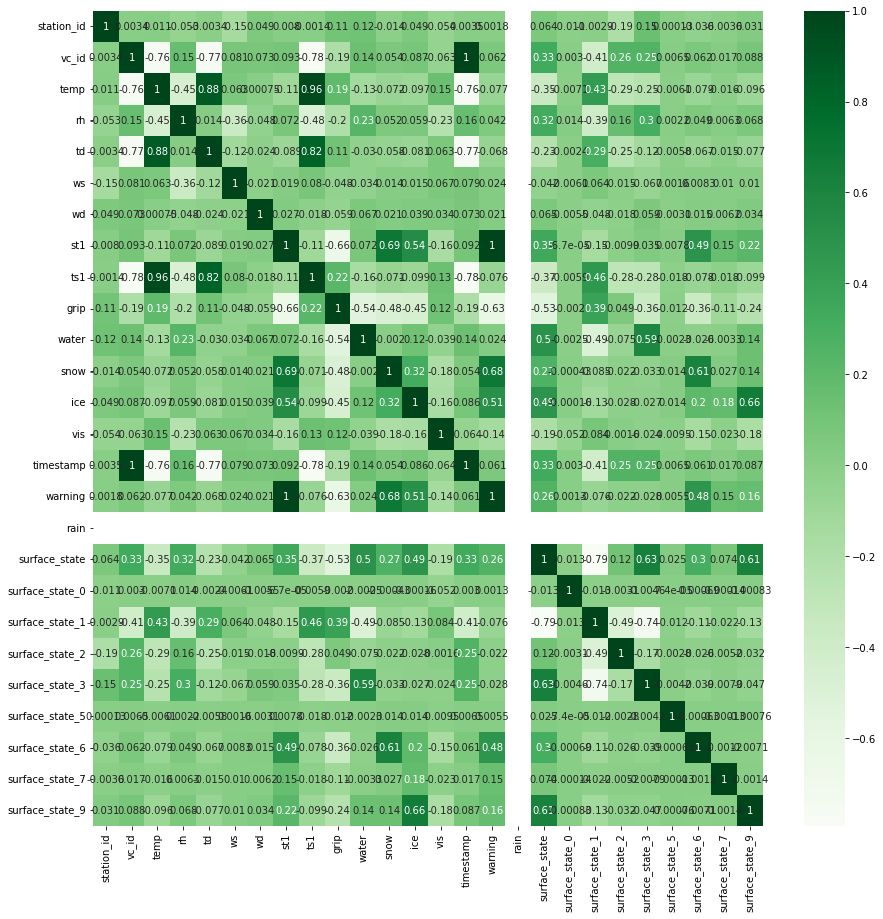

In [23]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df_clean.corr(),cmap="Greens",annot=True,ax=ax)
# sns.heatmap(df_lim_vis.corr(),annot=True,ax=ax)

In [ ]:
# for col in df_clean.columns:
#     for col2 in df_clean.columns:
#         if (col != "mes_datetime"):
#             if (col2 != "mes_datetime"):
#                 print(f'{col} {col2}')
#                 z = df_clean.plot.scatter(col,col2)
#                 plt.show()


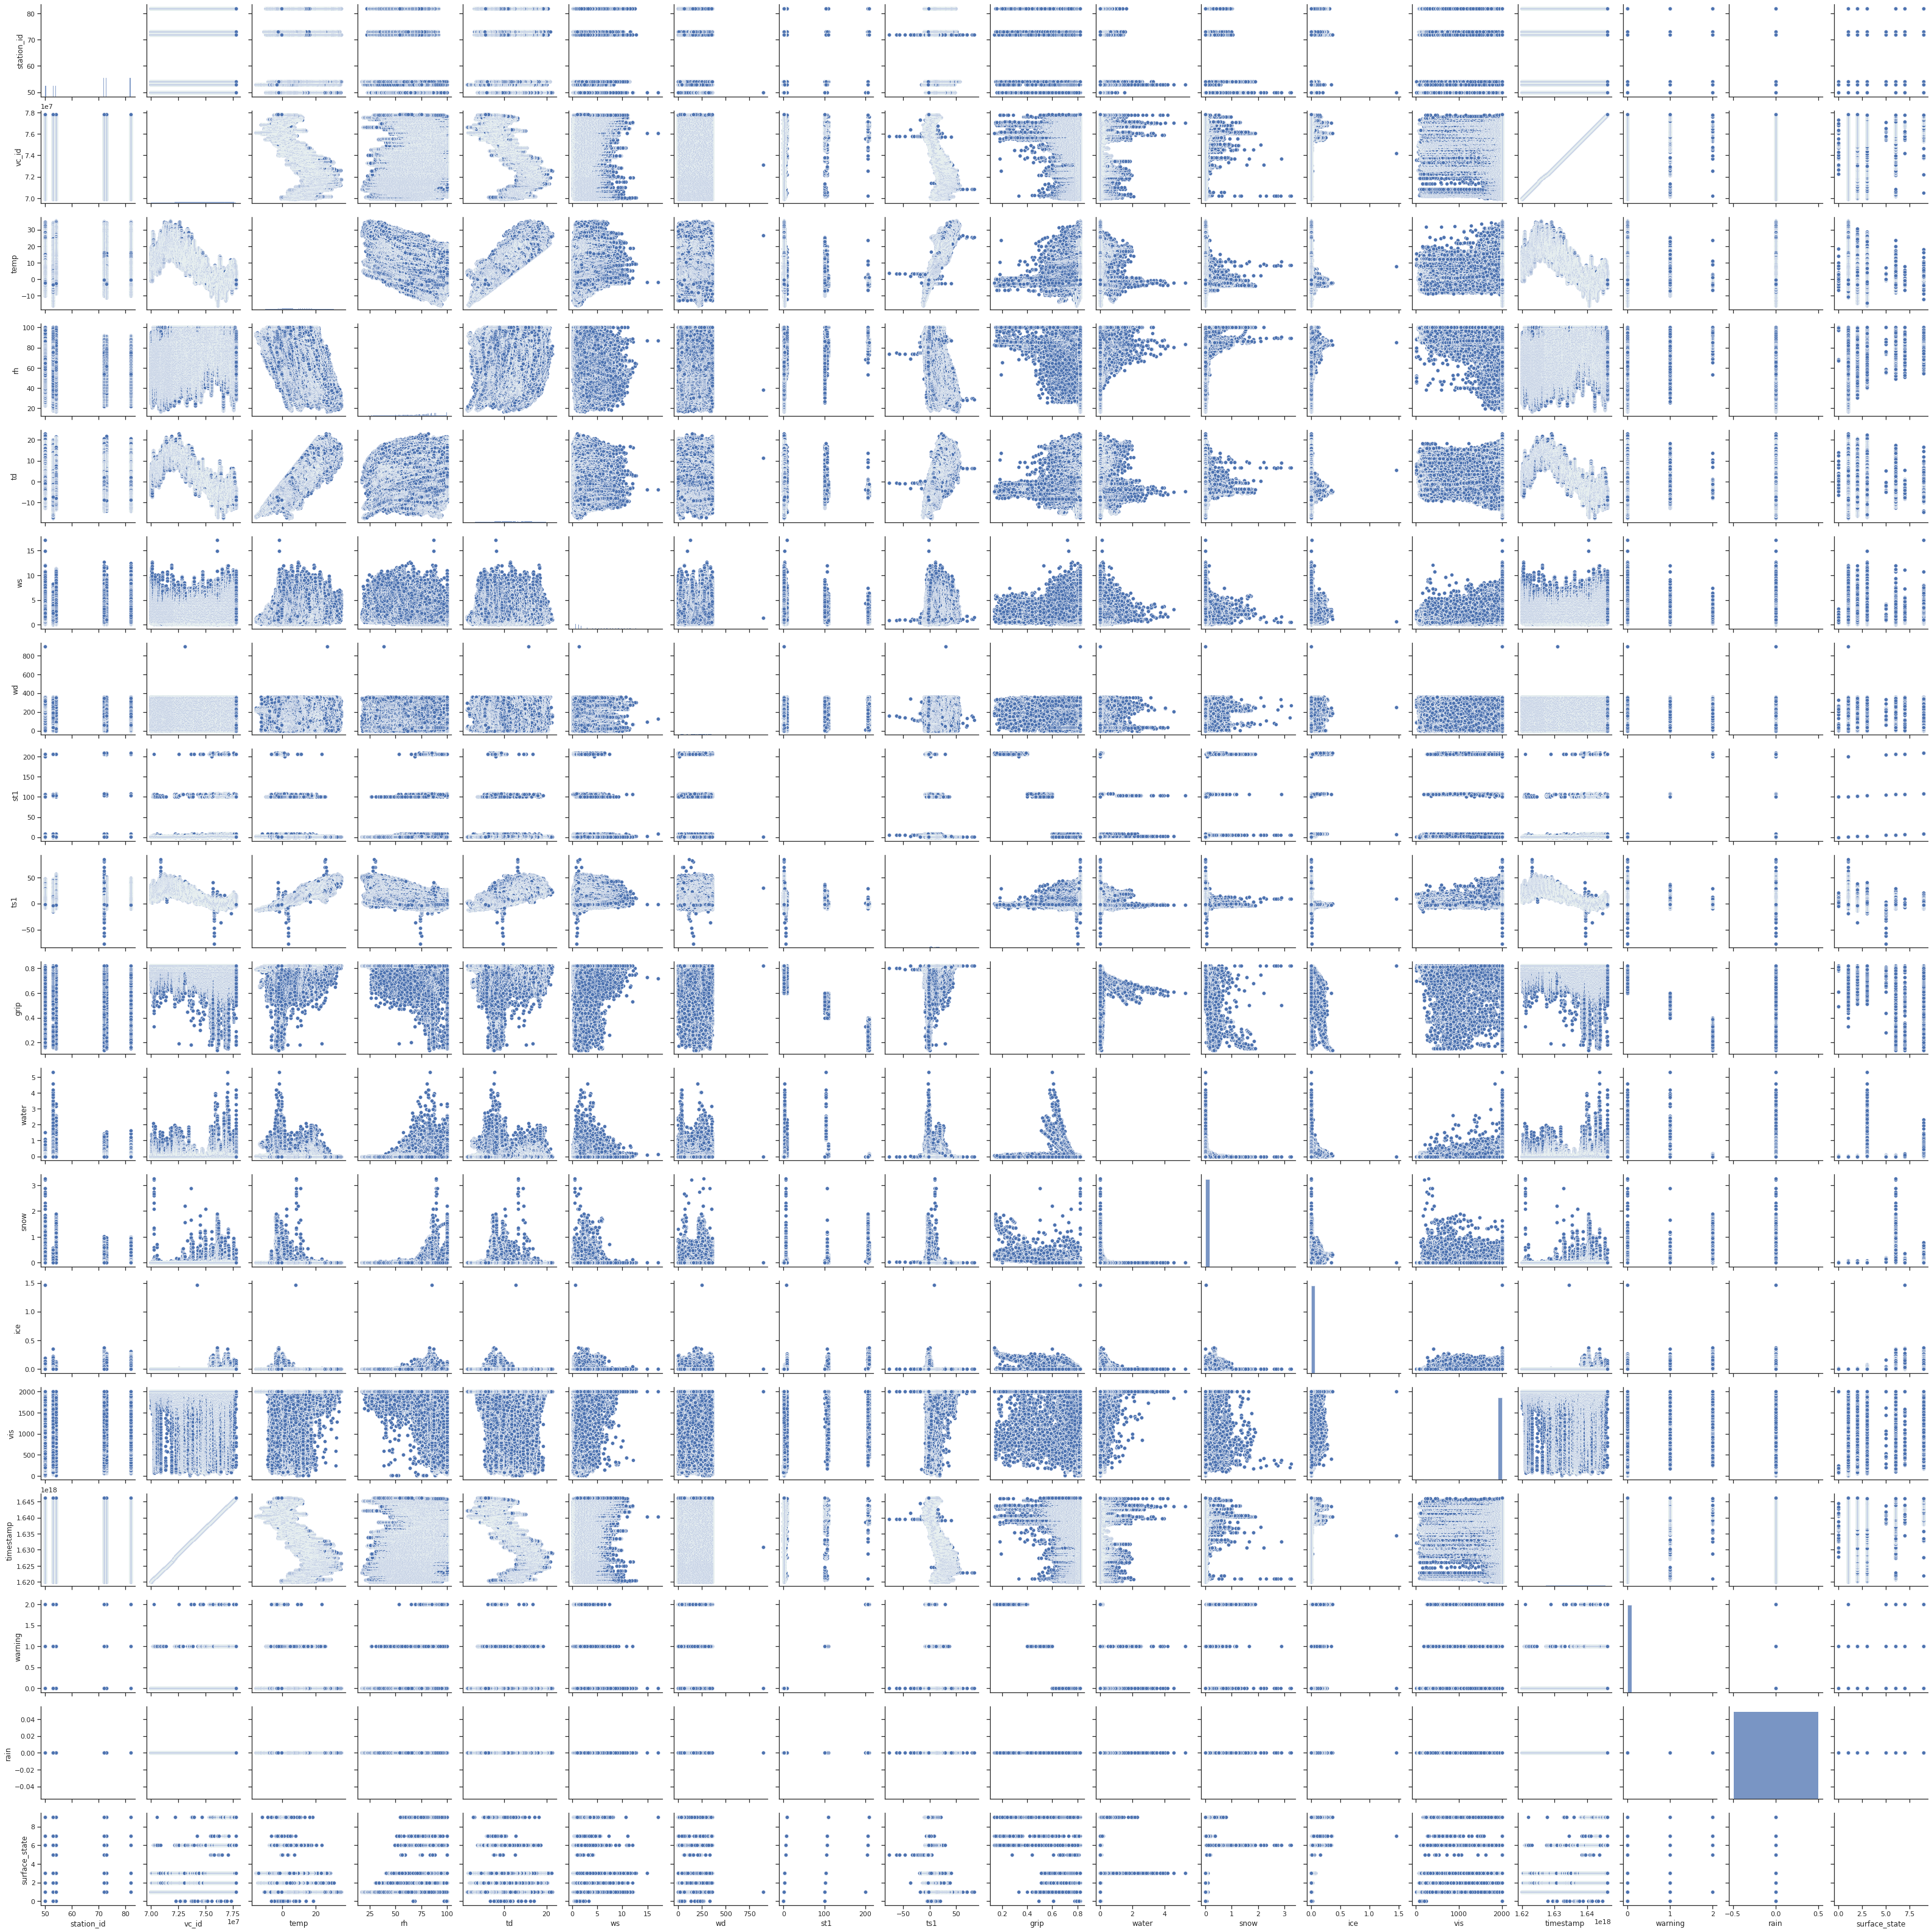

In [106]:
# df_lim_vis.plot.scatter()
# fig,ax=plt.subplots(figsize=(20,20))
# pd.plotting.scatter_matrix(df_clean.drop(columns=['mes_datetime']), ax=ax)

sns.set_theme(style="ticks")

# df = sns.load_dataset("penguins")
sns.pairplot(df_clean)
